<!-- <img src="https://www.conted.ox.ac.uk/www/static/images/oudce_logo.svg" alt="OXF_logo_HTML" width="300"> 
-->

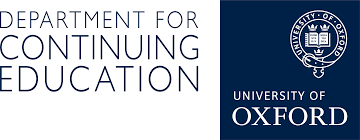 

<h1>Python Programming for Data Science Introduction</h1>
Weekly Oxford Worldwide (WOW) Course Format

<style>
div.scrollable {
    height: 300px;  /* Adjust this value as needed */
    overflow: auto;
    border: 1px solid #ccc;  /* Optional: Adds a border */
    padding: 10px;           /* Optional: Adds padding inside the box */
}
</style>

# Lecture 5 Pandas I


## Plan for this lecture

1. Pandas Series 

2. Pandas DataFrame 

3. Pandas functions

4. Exercises

## Introduction to Pandas

![pandas_logo](https://preview.redd.it/c6h7rok9c2v31.jpg?width=1080&crop=smart&auto=webp&s=3a92812520f9651db2900014b7973e3c3b5a43d4)

(https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/320px-Pandas_logo.svg.png)

* Pandas is a package that supplies data analysis tools in Python.

* DataFrames provide convenient formatting to visualise the data source. Often CSVs, and even NumPy arrays are used as the source for these DataFrames.

* It provides useful functions from summaries and descriptive statistics of data, in addition to SQL joins (GroupBy) 

* More documentation available at: https://pandas.pydata.org  


## Formatting CSV data in Pandas DataFrames

`pip install pandas`

`python3 -m pip install -U pandas --user`

In [2]:
import pandas as pd
pd

<module 'pandas' from '/Users/nick/Library/Python/3.9/lib/python/site-packages/pandas/__init__.py'>

In [3]:
import numpy as np 
np

<module 'numpy' from '/Users/nick/Library/Python/3.9/lib/python/site-packages/numpy/__init__.py'>

## Pandas Series

* Think of a Pandas Series as a single column of data, or a 1D array if you like. 

* The row details can have string labels or integer indices

In [124]:
my_list = [10,20,30]
pd.Series(my_list)

0    10
1    20
2    30
dtype: int64

In [8]:
labels = ['a','b','c']
my_list = [10,20,30]
pd.Series(my_list,labels)


a    10
b    20
c    30
dtype: int64

Numpy arrays can be converted to a Pandas Series

In [11]:
arr = np.array([10,20,30])
pd.Series(arr) 


0    10
1    20
2    30
dtype: int64

Python Dictionaries can also be converted to a Pandas Series

In [15]:
d = {'a' : 10, 'b' : 20, 'c' : 30}
d

{'a': 10, 'b': 20, 'c': 30}

In [130]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

## Indexing

In [131]:
ser1 = pd.Series([1,2,3], index = ['UK', 'USA', 'EU'])
ser1

UK     1
USA    2
EU     3
dtype: int64

In [132]:
ser1['UK']

1

In [133]:
ser1['USA']

2

## Adding / Concatenation 

* Just be aware that indices have to match exactly! 

* See below...

In [134]:
ser2 = pd.Series([5,3,7], index = ['UK', 'USA', 'ASIA'])
ser2


UK      5
USA     3
ASIA    7
dtype: int64

In [135]:
ser1 + ser2

ASIA    NaN
EU      NaN
UK      6.0
USA     5.0
dtype: float64

In [30]:
np.add(ser1, ser2)

ASIA    NaN
EU      NaN
UK      6.0
USA     5.0
dtype: float64

In [31]:
pd.concat([ser1, ser2])

UK      1
USA     2
EU      3
UK      5
USA     3
ASIA    7
dtype: int64

In [138]:
ser3 = pd.concat([ser1, ser2])
ser3

UK      1
USA     2
EU      3
UK      5
USA     3
ASIA    7
dtype: int64

In [140]:
pd.value_counts(ser3)

/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_36540/4098305703.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(ser3)


3    2
1    1
2    1
5    1
7    1
Name: count, dtype: int64

## Using `datetime` for `pd.Series` indices

* We've seen the use of integer indices and str indices. 

* We can also have `datetime` indices! 

* `datetime` indices will be useful for Time Series Analysis (which we'll see later in the course)

In [8]:
data = pd.Series([10, 20, 30])
dates = pd.to_datetime(['2024-01-01', '2025-04-29', '2023-12-15'])

data.index = dates

print(data)

2024-01-01    10
2025-04-29    20
2023-12-15    30
dtype: int64


In [11]:
years = pd.Series([2024, 2025, 2023])
months = pd.Series([1, 4, 12])
days = pd.Series([1, 29, 15])

dates = pd.to_datetime({'year': years, 'month': months, 'day': days})
dates

0   2024-01-01
1   2025-04-29
2   2023-12-15
dtype: datetime64[ns]

We will come back to the use of `datetime` for time series analysis later in the course.

## Pandas DataFrame

In [142]:
df = pd.DataFrame({'column 1': [1,2,3,4], 'column 2': [5,6,7,8]})  # Using the pandas package to create a DataFrame.
df

,column 1,column 2
0,1,5
1,2,6
2,3,7
3,4,8


## Col access

In [143]:
df = pd.DataFrame(np.random.randn(3,3),
                  index='A B C'.split(),
                  columns='X Y Z'.split())
df


,X,Y,Z
A,1.356425,-1.304502,1.148660
B,0.513187,-0.737688,1.009436
C,0.374554,1.565119,-1.970784


In [35]:
df['Z']

A   -1.138860
B    0.253194
C   -0.710403
Name: Z, dtype: float64

In [36]:
df[['X','Z']]

,X,Z
A,-1.044862,-1.138860
B,0.297150,0.253194
C,-0.357124,-0.710403


Add a new column via the subscript operator

In [145]:
df['W'] = [0.1, 0.2, 0.3]
df

,X,Y,Z,W
A,1.356425,-1.304502,1.148660,0.1
B,0.513187,-0.737688,1.009436,0.2
C,0.374554,1.565119,-1.970784,0.3


* Remember that `drop()` returns a view - doesn't affect the original df 

* Therefore need to assign this returned view to a df

In [146]:
df.drop(['W'], axis = 1)

,X,Y,Z
A,1.356425,-1.304502,1.148660
B,0.513187,-0.737688,1.009436
C,0.374554,1.565119,-1.970784


In [147]:
df

,X,Y,Z,W
A,1.356425,-1.304502,1.148660,0.1
B,0.513187,-0.737688,1.009436,0.2
C,0.374554,1.565119,-1.970784,0.3


In [148]:
df = df.drop(['W'], axis = 1)
df

,X,Y,Z
A,1.356425,-1.304502,1.148660
B,0.513187,-0.737688,1.009436
C,0.374554,1.565119,-1.970784


## Row access

In [39]:
df

,X,Y,Z
A,-1.044862,1.633030,-1.138860
B,0.297150,0.429540,0.253194
C,-0.357124,-1.112405,-0.710403


In [150]:
df.loc['A']

X    1.356425
Y   -1.304502
Z    1.148660
Name: A, dtype: float64

In [149]:
df.iloc[0]

X    1.356425
Y   -1.304502
Z    1.148660
Name: A, dtype: float64

## Basic operations / useful functions

In [153]:
df.head(2)

,X,Y,Z
A,1.356425,-1.304502,1.148660
B,0.513187,-0.737688,1.009436


In [155]:
df.tail(2)

,X,Y,Z
B,0.513187,-0.737688,1.009436
C,0.374554,1.565119,-1.970784


In [44]:
df.describe()

,X,Y,Z
count,3.000000,3.000000,3.000000
mean,-0.368278,0.316722,-0.532023
std,0.671075,1.376190,0.712964
min,-1.044862,-1.112405,-1.138860
25%,-0.700993,-0.341432,-0.924632
50%,-0.357124,0.429540,-0.710403
75%,-0.029987,1.031285,-0.228605
max,0.297150,1.633030,0.253194


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       3 non-null      float64
 1   Y       3 non-null      float64
 2   Z       3 non-null      float64
dtypes: float64(3)
memory usage: 204.0+ bytes


In [ ]:
df.isna().sum()

X    0
Y    0
Z    0
dtype: int64

In [156]:
print(df['X'].count())

3


In [48]:
print(df['X'].min())

-1.0448616047446062


In [49]:
print(df['X'].max())

0.29715013870668694


In [50]:
print(df['X'].mean())

-0.3682784158646874


## Reading / Writing CSV files in/out as DataFrames

* `df = pd.read_csv('your_filepath_here.csv')`


In [157]:
ecom_df = pd.read_csv("Ecommerce Purchases.csv")
type(ecom_df)

pandas.core.frame.DataFrame

In [159]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [160]:
ecom_df.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [162]:
ecom_df [ ecom_df['Purchase Price'] == 0.00 ]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2876,"332 Jones Parkways\nEast Katherineville, GA 64230",39 GT,AM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_6_9...,"Lyons, Diaz and Clark",4204500444841766,01/18,38,VISA 16 digit,jennifer11@baker.com,Biomedical scientist,223.47.177.174,it,0.0
5487,"465 Mallory Ways\nNorth Rebecca, RI 82734-1160",93 OH,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,Flynn and Sons,30469912089738,09/23,236,Discover,mjohnson@austin.org,Stage manager,43.99.56.59,zh,0.0


In [158]:
ecom_df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [118]:
ecom_df.sample(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9490,"279 Jones Crescent\nGonzalesstad, MS 13178",37 Nj,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_3 like M...,Hernandez-Valencia,30502181354175,01/26,228,Maestro,ureynolds@maxwell.com,"Lecturer, further education",113.70.137.12,pt,83.78
4093,USCGC Johnson\nFPO AE 61048,22 kl,PM,Opera/8.53.(Windows NT 5.2; en-US) Presto/2.9....,Nguyen-Flowers,180067246299847,08/24,589,VISA 16 digit,kelseygarcia@wolfe.com,Equality and diversity officer,40.72.128.10,zh,73.27
1960,"83317 Kevin Rue Suite 248\nKarentown, PA 89548...",29 KF,PM,Mozilla/5.0 (Windows NT 5.01; it-IT; rv:1.9.1....,Smith PLC,4365212541663011,12/17,319,American Express,mariah78@hotmail.com,Diplomatic Services operational officer,189.25.39.149,es,22.73


export to csv! 

In [114]:
ecom_df.to_csv("export.csv")

In [77]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(url, 
                      delimiter=',', 
                      names= ['sepal length', 'sepal width', 'petal length' , 'petal width', 'species'], 
                      encoding='utf-8', skiprows=1
            )
iris_df

,sepal length,sepal width,petal length,petal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


## DataFrames for CSVs / JSON 

* So let's see if we can convert our iris `numpy.array` to a pandas DataFrame to give us a view of the data. 

In [78]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, 
                     delimiter=',',
                     names=['sepal length', 'sepal width', 'petal length' , 'petal width', 'species'],
                     dtype=[np. float64, np.float64, np.float64, np.float64, 'U15']
        )
iris

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa'),
       (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
       (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
       (5. , 3.4, 1.5, 0.2, 'Iris-setosa'),
       (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
       (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
       (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
       (4.8, 3. , 1.4, 0.1, 'Iris-setosa'),
       (4.3, 3. , 1.1, 0.1, 'Iris-setosa'),
       (5.8, 4. , 1.2, 0.2, 'Iris-setosa'),
       (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
       (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
       (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
       (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
       (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
       (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
       (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
       (4.6, 3.6, 1. , 0.2, 'Iri

In [79]:
iris_df = pd.DataFrame(iris)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [163]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [165]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [167]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Select columns

In [168]:
attrs = ['sepal_length', 'sepal_width']
iris_df[attrs]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [169]:
iris_df[attrs].mean()

sepal_length    5.843333
sepal_width     3.054000
dtype: float64

In [170]:
iris_df[attrs].value_counts()

sepal_length  sepal_width
5.8           2.7            4
6.5           3.0            3
6.7           3.1            3
6.9           3.1            3
4.9           3.1            3
                            ..
5.5           2.3            1
5.4           3.7            1
              3.0            1
5.3           3.7            1
7.9           3.8            1
Name: count, Length: 116, dtype: int64

## Conditions

* Applying operators to columns returns a boolean mask for this column

In [97]:
iris_df["species"] == "Iris-virginica"

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [98]:
iris_df["sepal_length"] > 6

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Name: sepal_length, Length: 150, dtype: bool

To see only the rows which are TRUE - include the df context around this condition

In [99]:
iris_df[ iris_df["species"] == "Iris-virginica" ]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [100]:
iris_df[ iris_df['sepal_length'] > 7 ]

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


## How about multiple conditions? 

* <b>Question</b>: The code below throws an exception... why is this?

In [102]:
iris_df["species"] == "Iris-virginica" & iris_df['sepal_length'] > 7

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [103]:
(iris_df["species"] == "Iris-virginica") & (iris_df['sepal_length'] > 7)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [104]:
iris_df[ (iris_df["species"] == "Iris-virginica") & (iris_df['sepal_length'] > 7) ]

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


## GroupBy

![groupby](https://miro.medium.com/v2/resize:fit:1400/0*m-puRNwcnUl5zZ4O)

In [108]:
iris_df.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


In [106]:
iris_df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [107]:
iris_df.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [109]:
iris_df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


In [110]:
iris_df.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## EXTRA materials on importing data from APIs - iTunes Example:

Example searches:

* `https://itunes.apple.com/search?term=jack+johnson`

* `https://itunes.apple.com/search?term=jack+johnson&limit=25`

* `https://itunes.apple.com/search?term=queen&limit=25`

Not just music either, iTunes has books, which you can lookup via ISBN:

* `https://itunes.apple.com/lookup?isbn=9780316069359`

For more information and examples of how to construct search queries, see the [iTunes documentation here](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/SearchExamples.html#//apple_ref/doc/uid/TP40017632-CH6-SW1).



Depending on which environment you're running this notebook, you may need to install `requests` before using this package. 

`pip install requests`

`python3 -m pip install -U requests --user`

In [119]:
import requests

In [120]:
def search_itunes(query, media_type="music"):
    """Search iTunes and return results in JSON format.
    
    Args:
        query (str): The search term.
        media_type (str): The type of media to search for (e.g., music, movie, podcast).
    
    Returns:
        dict: The JSON response from the iTunes API.
    """
    base_url = "https://itunes.apple.com/search"
    params = {
        "term": query,
        "media": media_type,
        "limit": 10  # Limit the number of results to 10
    }
    
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        return response.json()  # Convert the response to JSON
    else:
        response.raise_for_status()  # Raise an exception for HTTP errors


In [121]:
#from search_itunes import search_itunes

df = pd.DataFrame(search_itunes("Python Programming", "ebook"))

In [122]:
df

,resultCount,results
0,12,"{'fileSizeBytes': 9524154, 'formattedPrice': '..."
1,12,"{'fileSizeBytes': 3807233, 'formattedPrice': '..."
2,12,"{'fileSizeBytes': 1693255, 'formattedPrice': '..."
3,12,"{'fileSizeBytes': 6151269, 'formattedPrice': '..."
4,12,"{'fileSizeBytes': 305883, 'formattedPrice': '$..."
5,12,"{'fileSizeBytes': 11014147, 'formattedPrice': ..."
6,12,"{'fileSizeBytes': 189804, 'formattedPrice': '$..."
7,12,"{'fileSizeBytes': 154278, 'formattedPrice': '$..."
8,12,"{'fileSizeBytes': 131835, 'formattedPrice': 'F..."
9,12,"{'fileSizeBytes': 6164878, 'formattedPrice': '..."


Due to the data being return as a list of dictionaries. 

If we 'zoom in' to the results column, we'll see the `{ }` syntax of the dictionary / json format. 


In [150]:
df['results']

0    {'currency': 'USD', 'artworkUrl60': 'https://i...
1    {'currency': 'USD', 'artworkUrl60': 'https://i...
2    {'currency': 'USD', 'artworkUrl60': 'https://i...
3    {'currency': 'USD', 'artworkUrl60': 'https://i...
4    {'currency': 'USD', 'artworkUrl60': 'https://i...
5    {'currency': 'USD', 'artworkUrl60': 'https://i...
6    {'currency': 'USD', 'artworkUrl60': 'https://i...
7    {'currency': 'USD', 'artworkUrl60': 'https://i...
8    {'currency': 'USD', 'artworkUrl60': 'https://i...
9    {'currency': 'USD', 'artworkUrl60': 'https://i...
Name: results, dtype: object

So how do we extract the values (rows) for each of these keys (which could act as column names) in a 2D matrix...

Well, thankfully there is a handy method named `json_normalise()` which does just the trick!

In [151]:
df_norm = pd.json_normalize(df['results'])
df_norm

,currency,artworkUrl60,artworkUrl100,artistViewUrl,description,trackId,trackName,trackCensoredName,fileSizeBytes,formattedPrice,...,genreIds,artistIds,releaseDate,price,genres,artistId,artistName,kind,averageUserRating,userRatingCount
0,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/daniel-corre...,This book is for beginners in programming and ...,6449404731,Python For Beginners: A Practical and Step-by-...,Python For Beginners: A Practical and Step-by-...,9524154,Free,...,"[10023, 38, 9027]",[279284673],2023-05-15T07:00:00Z,0.00,"[Programming, Books, Computers & Internet]",279284673,Daniel Correa,ebook,4.5,19.0
1,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/ratneshwaran...,"Welcome to Python, a programming language whic...",1524201116,Python Simplified,Python Simplified,3807233,Free,...,"[10023, 38, 9027]",[1524201117],2020-07-19T07:00:00Z,0.00,"[Programming, Books, Computers & Internet]",1524201117,Ratneshwaran Maheswaran,ebook,3.5,62.0
2,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/python-softw...,This is an iBooks version of an official Pytho...,952220899,Python 3 Tutorial,Python 3 Tutorial,6151269,Free,...,"[10017, 38, 9027]",[952227016],2014-12-16T08:00:00Z,0.00,"[Computers, Books, Computers & Internet]",952227016,Python Software Foundation.,ebook,4.0,20.0
3,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/bruce-embry/...,Why Python and why another Python book?\t\nSim...,1500081797,Fundamentals of Programming: Using Python,Fundamentals of Programming: Using Python,6164878,Free,...,"[10017, 38, 9027]",[1500081800],2020-02-14T08:00:00Z,0.00,"[Computers, Books, Computers & Internet]",1500081800,Bruce Embry,ebook,4.0,7.0
4,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/ryan-turner/...,<b>If you're looking for a way to become an ex...,1508241396,Python Programming,Python Programming,305883,$9.99,...,"[10023, 38, 9027]",[89761387],2020-04-16T07:00:00Z,9.99,"[Programming, Books, Computers & Internet]",89761387,Ryan Turner,ebook,NaN,NaN
5,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/james-tudor/...,Programming Doesn't Have To Be Difficult. If Y...,1551369966,Python Programming For Beginners,Python Programming For Beginners,1693255,Free,...,"[10023, 38, 9027]",[1326923077],2021-01-06T08:00:00Z,0.00,"[Programming, Books, Computers & Internet]",1326923077,James Tudor,ebook,2.0,6.0
6,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/knowledge-fl...,★★★★★LEARNING STARTS WITH VIEWING THE WORLD DI...,1102381732,Python Programming,Python Programming,154278,$0.99,...,"[10017, 38, 9027]",[1050452168],2016-04-11T07:00:00Z,0.99,"[Computers, Books, Computers & Internet]",1050452168,Knowledge flow,ebook,NaN,NaN
7,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/ryan-turner/...,<b>If you're looking for a complete beginners ...,1508240514,Python Programming,Python Programming,189804,$2.99,...,"[10023, 38, 9027]",[89761387],2020-04-16T07:00:00Z,2.99,"[Programming, Books, Computers & Internet]",89761387,Ryan Turner,ebook,NaN,NaN
8,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/wikibooks/85...,Now you can easily download your favorite Wiki...,857275140,Non-Programmer's Tutorial for Python 3,Non-Programmer's Tutorial for Python 3,131835,Free,...,

We now have this data in a table, ready for analysis! 

In [155]:
print(df_norm['averageUserRating'].count())

7


In [157]:
print(df_norm['averageUserRating'].max())

4.5


In [169]:
print(df_norm['averageUserRating'].mean())

3.642857142857143


In [168]:
df_norm[df_norm['averageUserRating'] > 3.5]

,currency,artworkUrl60,artworkUrl100,artistViewUrl,description,trackId,trackName,trackCensoredName,fileSizeBytes,formattedPrice,...,genreIds,artistIds,releaseDate,price,genres,artistId,artistName,kind,averageUserRating,userRatingCount
0,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/daniel-corre...,This book is for beginners in programming and ...,6449404731,Python For Beginners: A Practical and Step-by-...,Python For Beginners: A Practical and Step-by-...,9524154,Free,...,"[10023, 38, 9027]",[279284673],2023-05-15T07:00:00Z,0.0,"[Programming, Books, Computers & Internet]",279284673,Daniel Correa,ebook,4.5,19.0
2,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/python-softw...,This is an iBooks version of an official Pytho...,952220899,Python 3 Tutorial,Python 3 Tutorial,6151269,Free,...,"[10017, 38, 9027]",[952227016],2014-12-16T08:00:00Z,0.0,"[Computers, Books, Computers & Internet]",952227016,Python Software Foundation.,ebook,4.0,20.0
3,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/bruce-embry/...,Why Python and why another Python book?\t\nSim...,1500081797,Fundamentals of Programming: Using Python,Fundamentals of Programming: Using Python,6164878,Free,...,"[10017, 38, 9027]",[1500081800],2020-02-14T08:00:00Z,0.0,"[Computers, Books, Computers & Internet]",1500081800,Bruce Embry,ebook,4.0,7.0
8,USD,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://is1-ssl.mzstatic.com/image/thumb/Publi...,https://books.apple.com/us/artist/wikibooks/85...,Now you can easily download your favorite Wiki...,857275140,Non-Programmer's Tutorial for Python 3,Non-Programmer's Tutorial for Python 3,131835,Free,...,"[10017, 38, 9027, 10023]",[856249884],2014-04-06T21:47:50Z,0.0,"[Computers, Books, Computers & Internet, Progr...",856249884,Wikibooks,ebook,4.0,31.0


In [174]:
df_reduced = df_norm[["trackName", "artistName", "description", "releaseDate", "price", "averageUserRating", "userRatingCount"]]
df_reduced

,trackName,artistName,description,releaseDate,price,averageUserRating,userRatingCount
0,Python For Beginners: A Practical and Step-by-...,Daniel Correa,This book is for beginners in programming and ...,2023-05-15T07:00:00Z,0.00,4.5,19.0
1,Python Simplified,Ratneshwaran Maheswaran,"Welcome to Python, a programming language whic...",2020-07-19T07:00:00Z,0.00,3.5,62.0
2,Python 3 Tutorial,Python Software Foundation.,This is an iBooks version of an official Pytho...,2014-12-16T08:00:00Z,0.00,4.0,20.0
3,Fundamentals of Programming: Using Python,Bruce Embry,Why Python and why another Python book?\t\nSim...,2020-02-14T08:00:00Z,0.00,4.0,7.0
4,Python Programming,Ryan Turner,<b>If you're looking for a way to become an ex...,2020-04-16T07:00:00Z,9.99,NaN,NaN
5,Python Programming For Beginners,James Tudor,Programming Doesn't Have To Be Difficult. If Y...,2021-01-06T08:00:00Z,0.00,2.0,6.0
6,Python Programming,Knowledge flow,★★★★★LEARNING STARTS WITH VIEWING THE WORLD DI...,2016-04-11T07:00:00Z,0.99,NaN,NaN
7,Python Programming,Ryan Turner,<b>If you're looking for a complete beginners ...,2020-04-16T07:00:00Z,2.99,NaN,NaN
8,Non-Programmer's Tutorial for Python 3,Wikibooks,Now you can easily download your favorite Wiki...,2014-04-06T21:47:50Z,0.00,4.0,31.0
9,Learn Python,"Shyam Bharath, S.D.",Following topics in Python programming languag...,2018-08-04T07:00:00Z,0.00,3.5,24.0


In [176]:
df_reduced[df_reduced['averageUserRating'] > 3.5]

,trackName,artistName,description,releaseDate,price,averageUserRating,userRatingCount
0,Python For Beginners: A Practical and Step-by-...,Daniel Correa,This book is for beginners in programming and ...,2023-05-15T07:00:00Z,0.0,4.5,19.0
2,Python 3 Tutorial,Python Software Foundation.,This is an iBooks version of an official Pytho...,2014-12-16T08:00:00Z,0.0,4.0,20.0
3,Fundamentals of Programming: Using Python,Bruce Embry,Why Python and why another Python book?\t\nSim...,2020-02-14T08:00:00Z,0.0,4.0,7.0
8,Non-Programmer's Tutorial for Python 3,Wikibooks,Now you can easily download your favorite Wiki...,2014-04-06T21:47:50Z,0.0,4.0,31.0


#### This Jupyter Notebook contains exercises for you to extend your introduction to the basics with Python Pandas. Attempt the following exercises, which slowly build in complexity. If you get stuck, check back to the <a href = "https://www.youtube.com/watch?v=IDPDYv8WHzA"> Python lecture recording on Pandas here</a> or view the <a href = "https://www.w3schools.com/python/pandas/default.asp">W3Schools page on Python Pandas</a>, which includes examples, exercises and quizzes to help your understanding. 

`pip install numpy`  
`pip install pandas`  
`pip install matplotlib`  
`pip install seaborn`  


# 05 Pandas Ecommerce Purchases Exercise (by Jose Portila)

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.


** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

First check that you have access to `pandas`, by running the cell below:

In [ ]:
#import pandas as pd

<module 'pandas' from '/Users/nick/Library/Python/3.9/lib/python/site-packages/pandas/__init__.py'>

Assuming you downloaded the accompanying 'Ecommerce Purchases.csv' file, check that you can read this in as a Pandas DataFrame.

In [ ]:
... = pd.read_csv("Ecommerce Purchases.csv")
#type(df)

pandas.core.frame.DataFrame

### Exercise 1
**Check the head of the DataFrame.**

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


### Exercise 2
** How many rows and columns are there? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


### Exercise 3
** What is the average Purchase Price? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

50.34730200000025

### Exercise 4
** What were the highest and lowest purchase prices? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

99.989999999999995

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

0.0

### Exercise 5
** How many people have English 'en' as their Language of choice on the website? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

1098

### Exercise 6
** How many people have the job title of "Lawyer" ? **


In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

np.int64(30)

### Exercise 7
** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

PM    5068
AM    4932
Name: AM or PM, dtype: int64

### Exercise 8
** What are the 5 most common Job Titles? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

### Exercise 9
** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

513    75.1
Name: Purchase Price, dtype: float64

### Exercise 10
** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

1234    bondellen@williams-garza.com
Name: Email, dtype: object

### Exercise 11
** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

Address             39
Lot                 39
AM or PM            39
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         39
CC Security Code    39
CC Provider         39
Email               39
Job                 39
IP Address          39
Language            39
Purchase Price      39
dtype: int64

### Exercise 12
** Hard: How many people have a credit card that expires in 2025? **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

1033

### Exercise 13
** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [ ]:
# Create a new 'code cell' above 
# Call a Pandas method to create the view you see below:

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

## ADDITIONAL EXERCISES

### Exercise 14 

Read in the iris dataset as a numpy array with the code below. Can you extract the three Iris flower labels from the 'species' column ('Iris-setosa', 'Iris-veriscolor', and 'Iris-virginica') and make these keys in a dictionary, which map to a `list` of `tuples` representing each row?

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',',
names=['sepal length', 'sepal width', 'petal length' , 'petal width', 'species'],
dtype=[np. float64, np.float64, np.float64, np.float64, 'U15']
)
iris

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa'),
       (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
       (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
       (5. , 3.4, 1.5, 0.2, 'Iris-setosa'),
       (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
       (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
       (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
       (4.8, 3. , 1.4, 0.1, 'Iris-setosa'),
       (4.3, 3. , 1.1, 0.1, 'Iris-setosa'),
       (5.8, 4. , 1.2, 0.2, 'Iris-setosa'),
       (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
       (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
       (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
       (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
       (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
       (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
       (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
       (4.6, 3.6, 1. , 0.2, 'Iri

Below is an example of how the keys and values should be arranged:   
See if you can find an efficient way to organise an iris dictionary in this way. 

In [6]:
# Write your solution here. 


{'Iris-setosa': [(5.1, 3.5, 1.4, 0.2), (4.9, 3.0, 1.4, 0.2), Ellipsis],
 'Iris-veriscolor': [(7.0, 3.2, 4.7, 1.4), (6.4, 3.2, 4.5, 1.5), Ellipsis],
 'Iris-virginica': [(6.3, 3.3, 6.0, 2.5), (5.8, 2.7, 5.1, 1.9), Ellipsis]}

Extension: With the dictionary formatted this way, now produce some descriptive statistics for each of the three flowers - minimum and maximum values, and the mean values. 

In [ ]:
# Write your solution here. 


### Exercise 15

Revisit the `search_itunes()` code from the `Extra` section in this notebook. 


In [26]:
import requests

/Users/nick/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [27]:
def search_itunes(query, media_type="music"):
    """Search iTunes and return results in JSON format.
    
    Args:
        query (str): The search term.
        media_type (str): The type of media to search for (e.g., music, movie, podcast).
    
    Returns:
        dict: The JSON response from the iTunes API.
    """
    base_url = "https://itunes.apple.com/search"
    params = {
        "term": query,
        "media": media_type,
        "limit": 10  # Limit the number of results to 10
    }
    
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        return response.json()  # Convert the response to JSON
    else:
        response.raise_for_status()  # Raise an exception for HTTP errors


In [29]:
query = "Taylor Swift"
media_type = "music"
results = search_itunes(query, media_type)

results

{'resultCount': 12,
 'results': [{'wrapperType': 'track',
   'kind': 'song',
   'artistId': 159260351,
   'collectionId': 1468058165,
   'trackId': 1468058173,
   'artistName': 'Taylor Swift',
   'collectionName': 'Lover',
   'trackName': 'Lover',
   'collectionCensoredName': 'Lover',
   'trackCensoredName': 'Lover',
   'artistViewUrl': 'https://music.apple.com/us/artist/taylor-swift/159260351?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/lover/1468058165?i=1468058173&uo=4',
   'trackViewUrl': 'https://music.apple.com/us/album/lover/1468058165?i=1468058173&uo=4',
   'previewUrl': 'https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview211/v4/4f/fd/c7/4ffdc746-c0de-999b-eb93-2753eaa18978/mzaf_8574966813156057641.plus.aac.p.m4a',
   'artworkUrl30': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/49/3d/ab/493dab54-f920-9043-6181-80993b8116c9/19UMGIM53909.rgb.jpg/30x30bb.jpg',
   'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/49/3d/ab/4

See below the attempt to format the data returned from the `search_itunes()` function to format the data into a DataFrame.

Question: What do you notice about the results column below? 

In [32]:
#from search_itunes import search_itunes #only if you have a .py script for search_itunes

df = pd.DataFrame(search_itunes("Taylor", "music"))
df

,resultCount,results
0,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
1,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
2,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
3,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
4,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
5,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
6,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
7,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
8,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."
9,10,"{'wrapperType': 'track', 'kind': 'song', 'arti..."


Your task is to transform the above DataFrame into the format shown below: 

In [33]:
# Write your solution here... 


,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,...,discCount,discNumber,trackCount,trackNumber,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistName
0,track,song,400555769,1506831755,1506832357,Natalie Taylor,Surrender - Single,Surrender,Surrender - Single,Surrender,...,1,1,1,1,183103,USA,USD,Singer/Songwriter,True,NaN
1,track,song,400555769,1182561824,1182561980,Natalie Taylor,In the Air Tonight - Single,In the Air Tonight,In the Air Tonight - Single,In the Air Tonight,...,1,1,1,1,173789,USA,USD,Singer/Songwriter,True,NaN
2,track,song,400555769,880114237,880114240,Natalie Taylor,Love Life - Single,Love Life,Love Life - Single,Love Life,...,1,1,1,1,186766,USA,USD,Pop,True,NaN
3,track,song,400555769,1519882762,1519882765,Natalie Taylor,Surrender (Kina Remix) - Single,Surrender (Kina Remix),Surrender (Kina Remix) - Single,Surrender (Kina Remix),...,1,1,1,1,161385,USA,USD,Singer/Songwriter,True,NaN
4,track,song,400555769,1178290096,1178290111,Natalie Taylor,Loved You Before - Single,Loved You Before,Loved You Before - Single,Loved You Before,...,1,1,1,1,202500,USA,USD,Singer/Songwriter,True,NaN
5,track,song,645420096,1572859144,1572859302,ILLENIUM & Natalie Taylor,Fallen Embers,Fragments,Fallen Embers,Fragments,...,1,1,14,3,210000,USA,USD,Dance,True,ILLENIUM
6,track,song,400555769,978021284,978021290,Natalie Taylor,Wildfire - EP,Wildfire,Wildfire - EP,Wildfire,...,1,1,4,3,191226,USA,USD,Singer/Songwriter,True,NaN
7,track,song,400555769,1457378386,1457378387,Natalie Taylor,Iris - Single,Iris,Iris - Single,Iris,...,1,1,1,1,170921,USA,USD,Singer/Songwriter,True,NaN
8,track,song,400555769,1154603331,1154603480,Natalie Taylor,Amen - Single,Amen,Amen - Single,Amen,...,1,1,1,1,196154,USA,USD,Singer/Songwriter,True,NaN
9,track,song,400555769,988419300,988419846,Natalie Taylor,I Want It All - Single,I Want It All,I Want It All - Single,I Want It All,...,1,1,1,1,210136,USA,USD,Singer/Songwriter,True,NaN


Extension: Write code which returns the song with the longest `trackTime`

Hint: Start by identifying the column that has data on the `trackTime`

### Exercise 16

Find an CSV file online, that you can import via `read_csv()`. Be aware that the data needs to be in raw format (without the html/css/table structure). Alternatively, download the CSV file and read it locally (as some sites won't give you the raw data in a readable/scrapable format).

Examples of CSV data: 

https://github.com/riteshc6/amazon_scraper/blob/master/downloads/Computers%20%26%20Accessories.csv

https://raw.githubusercontent.com/riteshc6/amazon_scraper/master/downloads/Computers%20%26%20Accessories.csv

In [145]:
url = "https://raw.githubusercontent.com/riteshc6/amazon_scraper/master/downloads/Computers%20%26%20Accessories.csv" 

df = pd.read_csv(url)

df

Inspect the data from your chosen CSV, and perform some exploratory data analysis.   
Question: What trends do you see?